In [1]:
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal     # for generating pdf
import numpy as np 
import pandas as pd
import os
import matplotlib .pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

ПРОЕКТ:

0) Изучаете контекст датасета и придумываете бизнес-цель
1) Делаете постановку задач на исследование (минимум 2 задачи, 1 под классфификацию/регрессию, 1 под кластеризацию (в крайнем случае делаем допущение что у нас нет Y) , )
2) Оценка Датасета (pandas/np/statsmodel...)
3) Подготовка данных
4) Выполнение исследований ( в том числе с промежуточными итогами, визуализациями)
5) Итоговые визуализации и выводы
6) Предложения по развитию вашей работы

1) Кластеризация

В данном проекте предстоит работа с общедоступным набором данных о людях и их жизненных показателей с целью предсказать вероятность инсульта у той или иной группы лиц

Цель: На основе имеющегося датасета построить модель, позволяющую отнести ту или иную группу лиц к определнной категории, вполне однозначно описывающей вероятность появяления инсульта

Общая постновка:
       Частная медицинская клиника N, выполняющая исследования преимущественно связанные с острым нарушением кровоснабжения головного мозга, характеризующееся внезапным (в течение нескольких минут, часов) появлением очаговой и/или общемозговой неврологической симптоматики  (инсультом) приняла решение обратиться в мою компанию RUS с целью оказать им услугу категоризации  пациентов по определенным критериям с целью дальнейшего предсказания вероятности инсульта у той или иной группы пациентов.

Актуальность исследования:

    По данным Всемирной организации здравоохранения (ВОЗ), инсульт занимает второе место среди причин смерти в мире, на него приходится около 11% всех смертей. Что говорят об остроте и очевидной актуальности выбранной темы исследования.

    Медицинская лаборатория любезно предоставила нам набор данных, отраженный в полном объеме в файле с незамысловатым названием healthcare.csv
    Данный файл содержит в себе удивительно огромный набор данных, ведь в нем содержится информация о более чем 5000 пациентов (если быть максимально точным, то 5110 пациентов) и набор из 12 признаков в полном объеме определяющих пациентов 


In [2]:
FILEPATH = 'healthcare.csv'
dataset = pd.read_csv(FILEPATH)
dataset = dataset.reset_index(drop = True)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Набор данных содержит данные о 5110 пациентах и для каждого из них имеется следующие 11 показателей:

id-айди пациента

gender-Пол

age-Возраст пациента

hypertension-Наличие гипертонии

heart_disease-Наличие заболеваний сердца 

Ever_maried-Наличие брака

Work_type-Тип работы

Residence_type-Местность проживания

Avg_glucose_level-Средний уровень глюкозы

bmi-Индекс массы тела

Smoking_status-Статус курения

stroke-Наличие инсульта






Показатель id не представляет из себя никакой ценности, по этому он будет исключен из нашего набора данных.

Также можно заметить, что не все показатели представляют числовые значения, с этим фактом нам предстоит разобраться

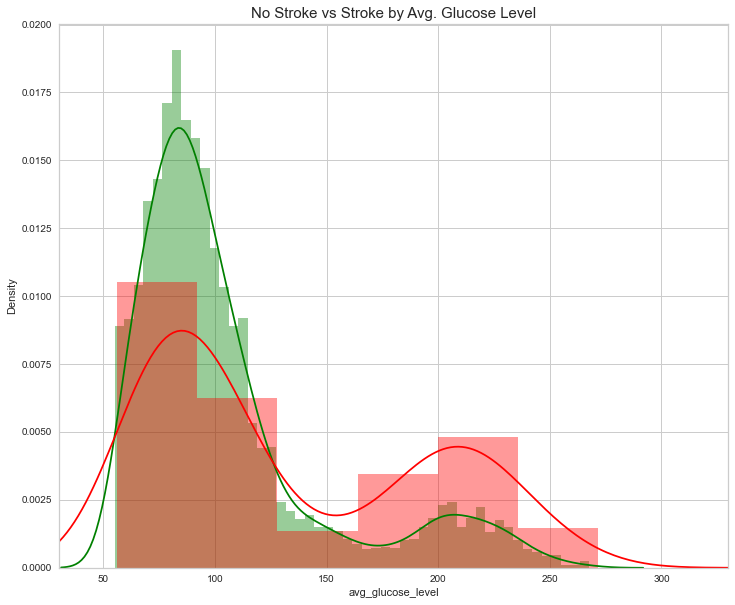

In [5]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

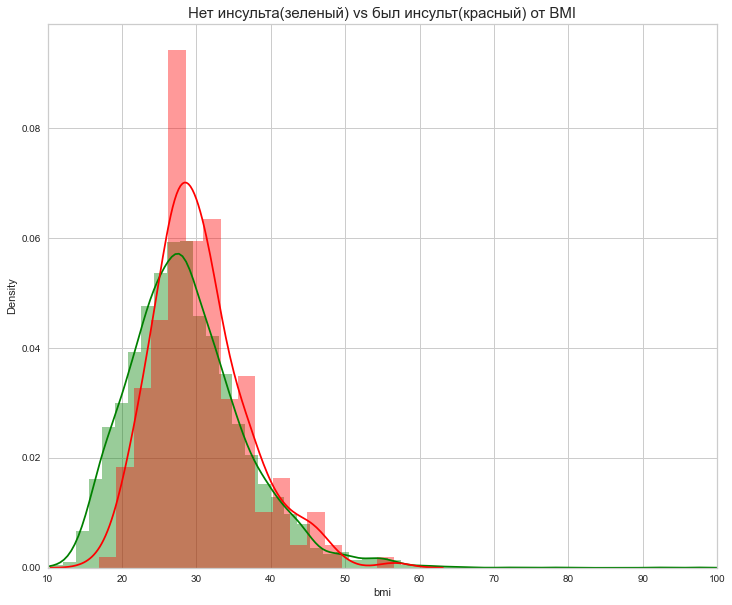

In [6]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title( 'Нет инсульта(зеленый) vs был инсульт(красный) от BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

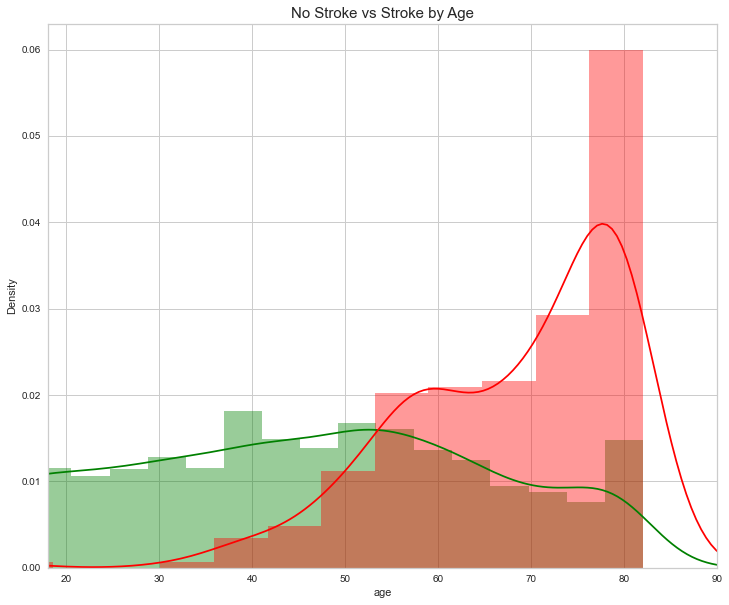

In [7]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,90])
plt.show()

Можно четко заметить, что люди подверженные инсульту в большинстве своем имели повышенный уровень глюкозы, достаточно низкий ИМТ и большой возраст пациентов

Однако некоторые признаки все еще имеет нечисловые значения, для исправления этой оплощности используем кодировщик LabelEncoder

In [3]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(dataset['gender'])
smoking_status=enc.fit_transform(dataset['smoking_status'])
work_type=enc.fit_transform(dataset['work_type'])
Residence_type=enc.fit_transform(dataset['Residence_type'])
ever_married=enc.fit_transform(dataset['ever_married'])
dataset['ever_married']=ever_married
dataset['Residence_type']=Residence_type
dataset['smoking_status']=smoking_status
dataset['gender']=gender
dataset['work_type']=work_type
dataset[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


In [4]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Итак пустые строки присутствуют, но избавимся мы от них немного позже. Сейчас же изучим нашу выборку на наличие выбросов.
Найдем выбросы используя IQR(межквартильный размах)
Для начала вычислим первый и третий квантили Q1 и Q3
Затем оценим межквартильный размах IQR= Q3 - Q1
Оцениваем нижнюю и верхнюю границы: minimum и maximum
Точки данных, лежащие за пределами нижней и верхней границ, являются выбросами.

In [5]:
df1=dataset['stroke']
df2=dataset['hypertension']
df3=dataset['heart_disease']
df1

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [6]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [7]:
dataset=dataset.drop(['hypertension','heart_disease','stroke'], axis=1)

In [8]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers = np.sum((data < minimum) | (data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100


non_categorical_data = dataset.drop(['id'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = str(round(outlier_percent(data), 2))

Всем выбросам присваиваем значение NaN

In [9]:
for column in non_categorical_data.columns:
    data = non_categorical_data[column]

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)

    outliers = ((data < minimum) | (data > maximum))
    non_categorical_data[column].loc[outliers] = np.nan

In [10]:
non_categorical_data.isna().sum()

gender                 0
age                    0
ever_married           0
work_type            657
Residence_type         0
avg_glucose_level    627
bmi                  311
smoking_status         0
dtype: int64

Количество выбросов поражает воображение ! Теперь когда все наши выбросы заменены Nan значением, вспоминаем про пустые строки которые мы определили изначально и избавимся от всех них разом. Для этого используем метод к-ближних соседей(KNN) из обучающегося набора

In [11]:
imputer = KNNImputer()
dataset = pd.DataFrame(imputer.fit_transform(
    non_categorical_data), columns=non_categorical_data.columns)


In [12]:
dataset.isna().sum()

gender               0
age                  0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   ever_married       5110 non-null   float64
 3   work_type          5110 non-null   float64
 4   Residence_type     5110 non-null   float64
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
 7   smoking_status     5110 non-null   float64
dtypes: float64(8)
memory usage: 319.5 KB


Таким образом, мы избавились от пустых строк и от выбросов в наших данных

Затем стандартизируем наши данные при помощи StandardScaler.
Прежде чем перейти к стандартизации, давайте сначала разберемся с концепцией масштабирования. Масштабирование функций – важный шаг в моделировании алгоритмов с помощью наборов данных.

Итак, полученные данные содержат в совокупности признаки разного размера и масштаба. Различные масштабы функций данных отрицательно влияют на моделирование набора данных. 

Это приводит к предвзятому результату прогнозов с точки зрения ошибок классификации и показателей точности. Таким образом, перед моделированием необходимо масштабировать данные. 

Вот тут-то и появляется стандартизация. 
Стандартизация – это метод масштабирования, при котором данные не масштабируются путем преобразования статистического распределения данных в следующий формат: среднее – 0 (ноль); стандартное отклонение – 1. 
 
Таким образом, весь набор данных масштабируется вместе с нулевым значением и единичной дисперсией.


In [14]:
dataset = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns)
dataset.describe()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,-7.508671e-17,5.005781e-17,-6.118176e-17,2.850514e-16,-9.177264e-17,-6.563134e-16,-8.064869e-17,5.561978e-18
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00
min,-8.403440e-01,-1.908261e+00,-1.381436e+00,-2.040065e+00,-1.016178e+00,-1.685154e+00,-2.699294e+00,-1.285114e+00
25%,-8.403440e-01,-8.061152e-01,-1.381436e+00,-6.384768e-01,-1.016178e+00,-6.820858e-01,-7.082684e-01,-1.285114e+00
50%,-8.403440e-01,7.843218e-02,7.238842e-01,-6.384768e-01,9.840797e-01,-1.363125e-01,-3.964024e-02,5.815523e-01
75%,1.188073e+00,7.860701e-01,7.238842e-01,7.631112e-01,9.840797e-01,5.158680e-01,6.438463e-01,5.815523e-01
max,3.216489e+00,1.714845e+00,7.238842e-01,2.164699e+00,9.840797e-01,3.603073e+00,2.828031e+00,1.514885e+00


Следующим шагом рассмотрим основные статистические показатели по каждому признаку

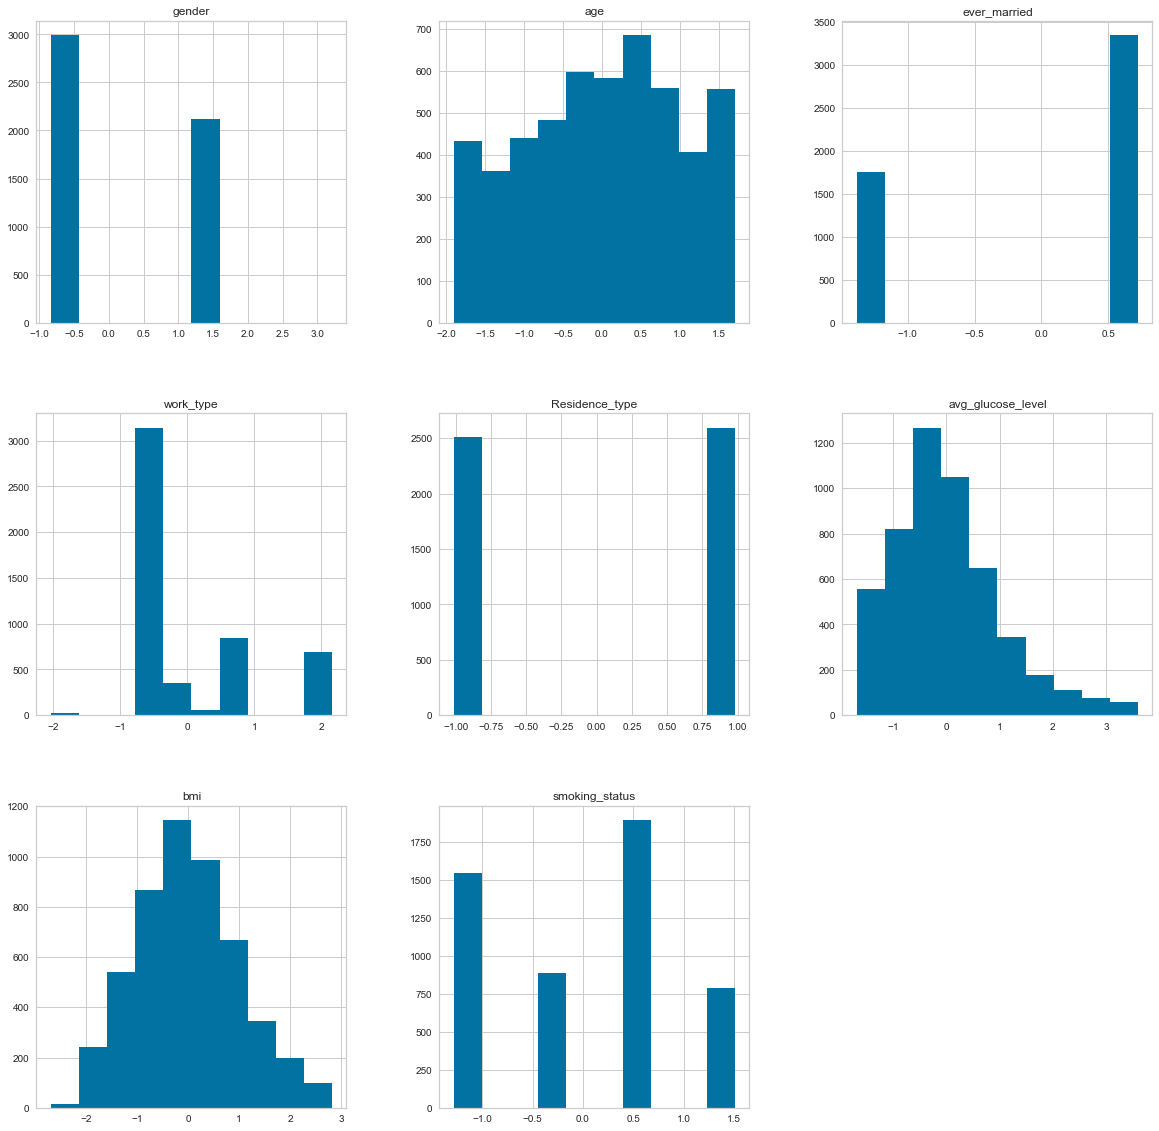

In [15]:

dataset.hist(figsize = (20, 20))
plt.show()


Рассмотрим исследование взаимосвязей между признаками

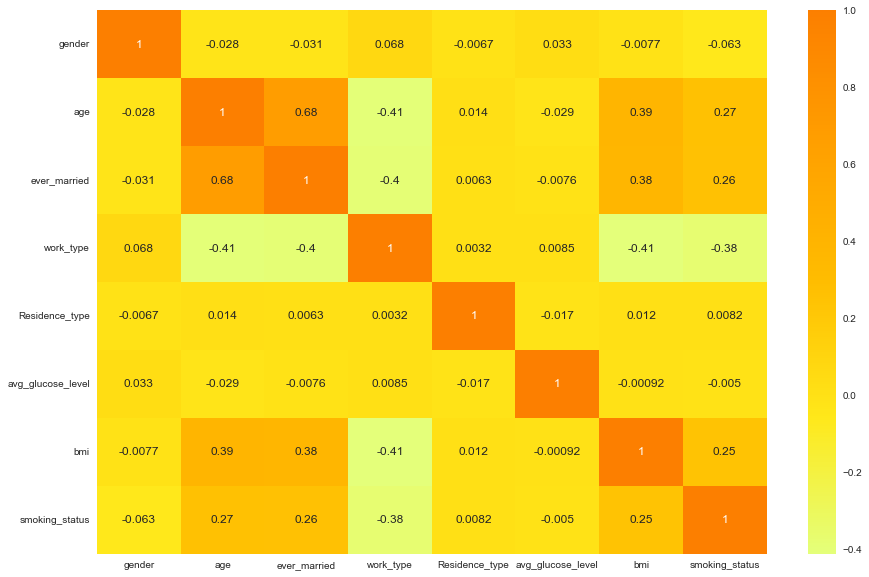

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, cmap = 'Wistia')
plt.show()

Перейдем к масштабированию признаков

In [15]:
#Предварительная обработка данных. Используем MinMaxScaler, чтобы все признаки сходились строго в диапазоне от 0 до 1
from sklearn.preprocessing import MinMaxScaler
num = MinMaxScaler().fit_transform(dataset)
dataset = pd.DataFrame(data = num, columns=dataset.columns)
dataset.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.5,0.816895,1.0,0.333333,1.0,0.260461,0.706989,0.333333
1,0.0,0.743652,1.0,0.666667,0.0,0.406199,0.661290,0.666667
2,0.5,0.975586,1.0,0.333333,0.0,0.447341,0.596774,0.666667
3,0.0,0.597168,1.0,0.333333,1.0,0.290067,0.647849,1.000000
4,0.0,0.963379,1.0,0.666667,0.0,0.272966,0.368280,0.666667


In [16]:
dataset['stroke']=df1
dataset['hypertension']=df2
dataset['heart_disease']=df3
dataset.describe()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hypertension,heart_disease
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.207143,0.526692,0.656164,0.485179,0.508023,0.318661,0.488354,0.458969,0.048728,0.097456,0.054012
std,0.246522,0.276033,0.475034,0.237849,0.499985,0.189118,0.180937,0.357178,0.215320,0.296607,0.226063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.333333,0.000000,0.189679,0.360215,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.548340,1.000000,0.333333,1.000000,0.292885,0.481183,0.666667,0.000000,0.000000,0.000000
75%,0.500000,0.743652,1.000000,0.666667,1.000000,0.416212,0.604839,0.666667,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
dataset=dataset.drop(['stroke'], axis=1)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   ever_married       5110 non-null   float64
 3   work_type          5110 non-null   float64
 4   Residence_type     5110 non-null   float64
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
 7   smoking_status     5110 non-null   float64
 8   hypertension       5110 non-null   int64  
 9   heart_disease      5110 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 399.3 KB


Также рассмотрим графики распределения взаимедействий отдельных ключевых признаков в зависимости от наличия инсульта


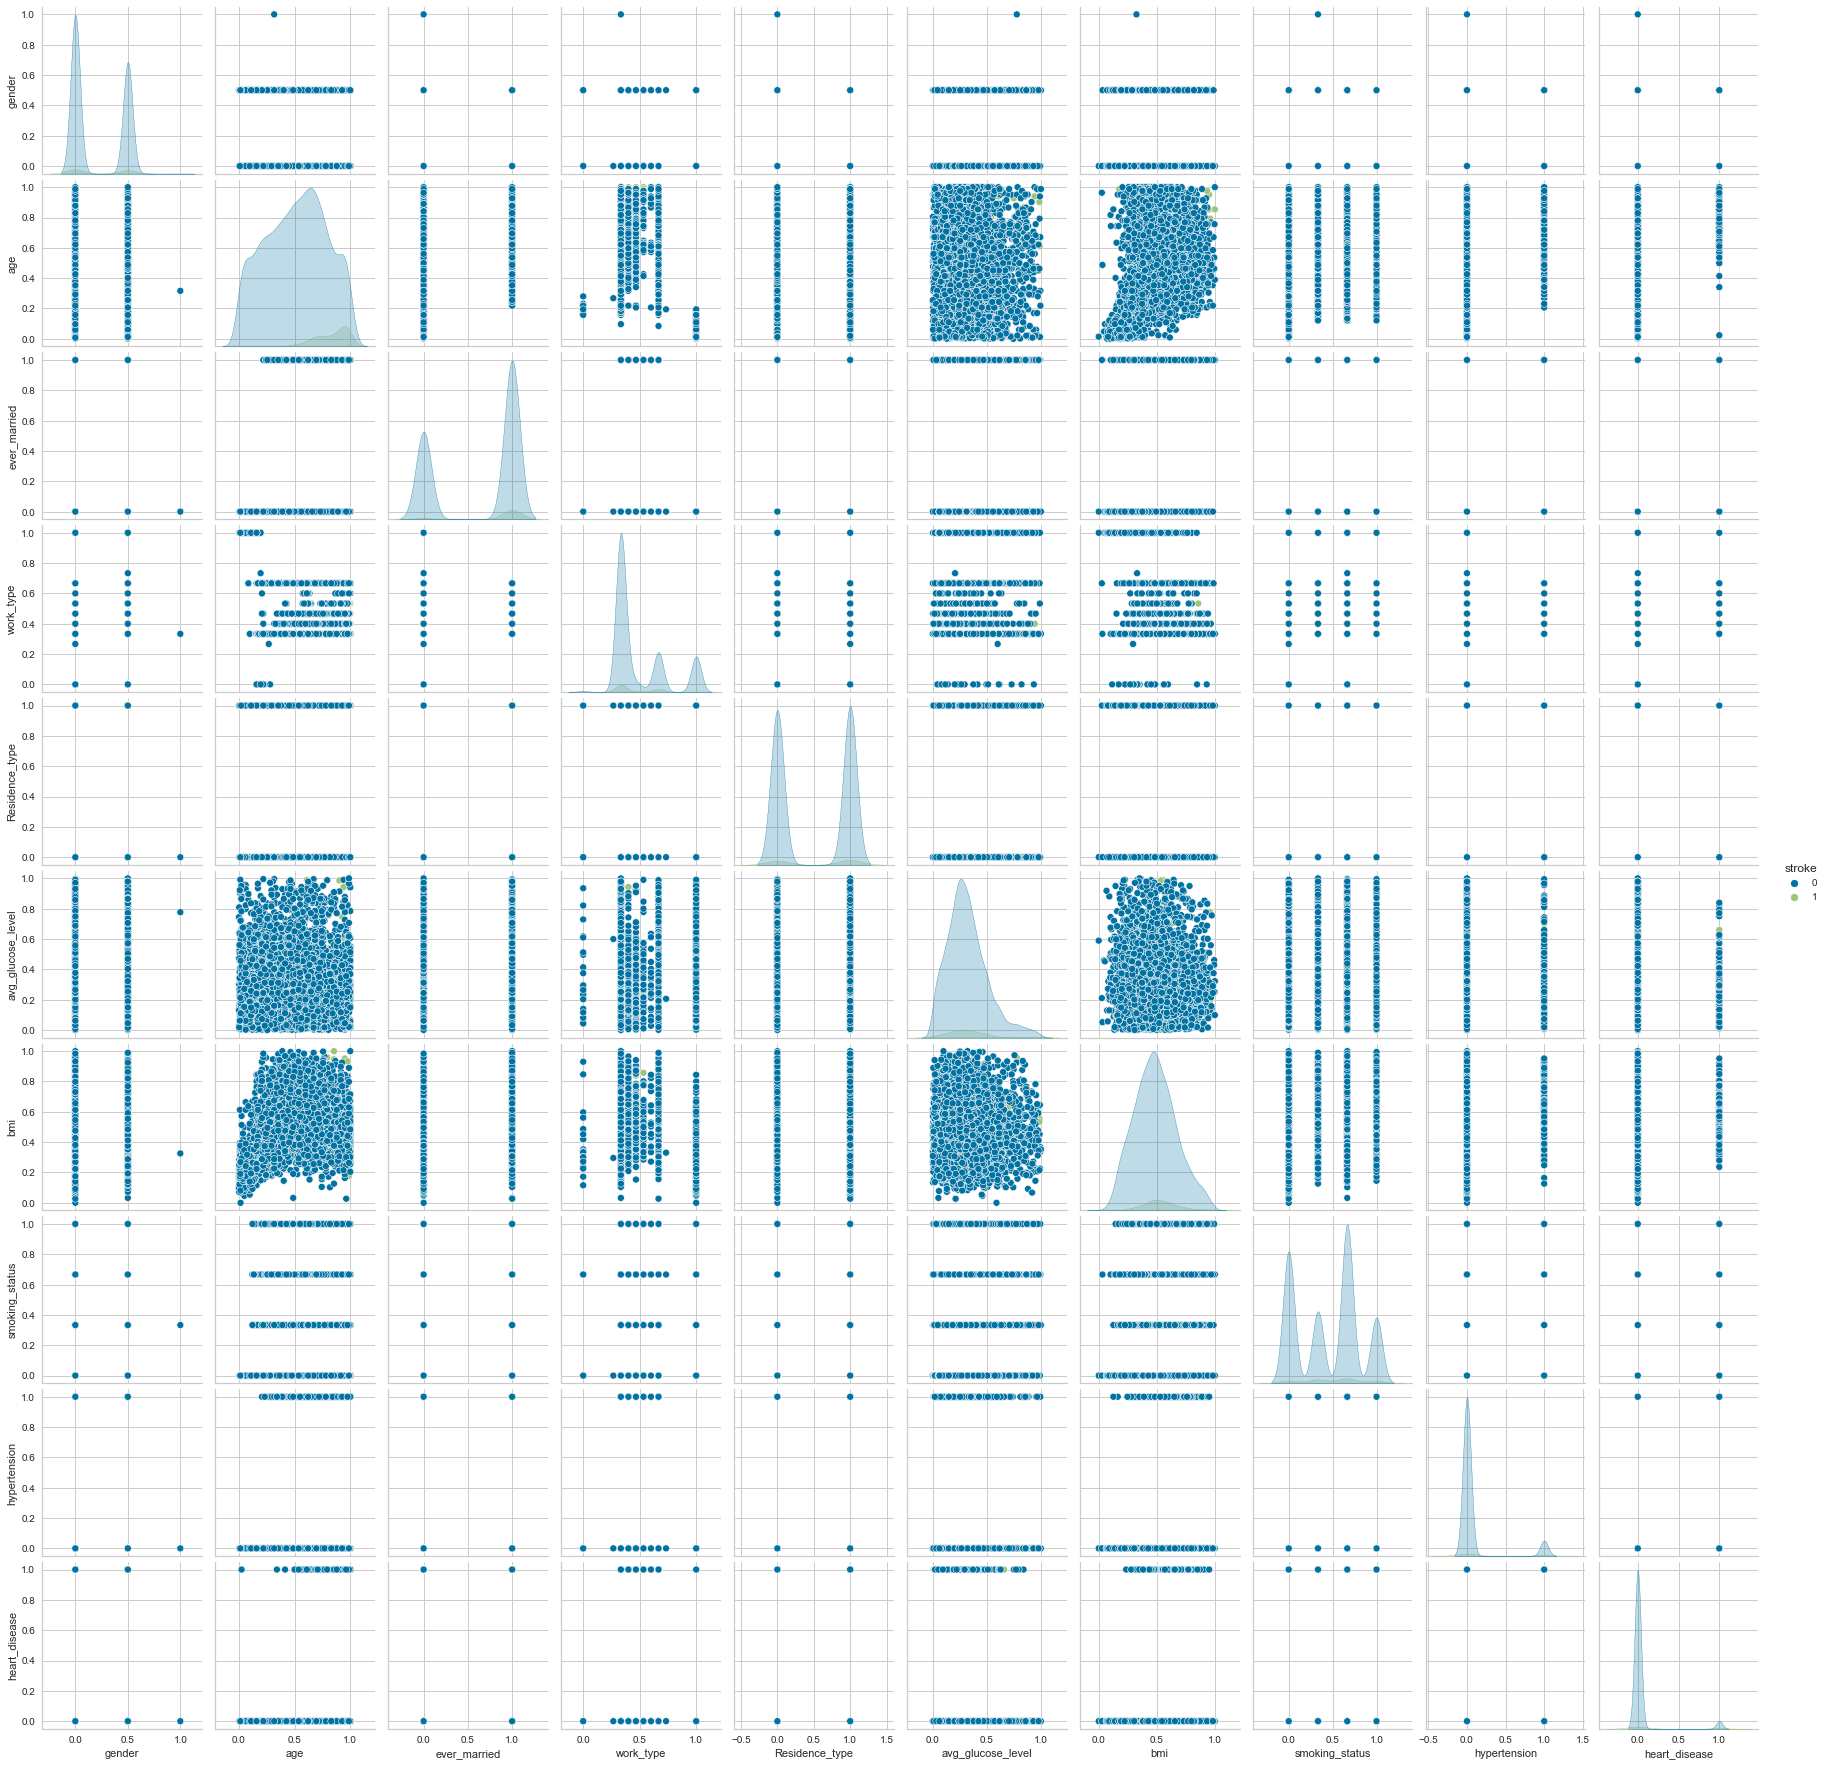

In [16]:
sns.pairplot(dataset, hue='stroke')

Cледующим шагом идет кластеризация 

Задачи: Сегментировать представленную аудиторию пациентов медецинского учереждения путем формирования кластеров.
Определить количество кластеров, их основные признаки

In [19]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.svm import SVC
from sklearn.metrics import recall_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hier_cluster = linkage(dataset, method='ward')

Далее следует построить иерархическую диаграмму

   Построение иерархической диаграммы может дать неплохое представление о потенциальном количестве кластеров.
Такой подход является хорошем подготовительным этапом перед применением метода k-means, т.к. для него требуется указать количество кластеров

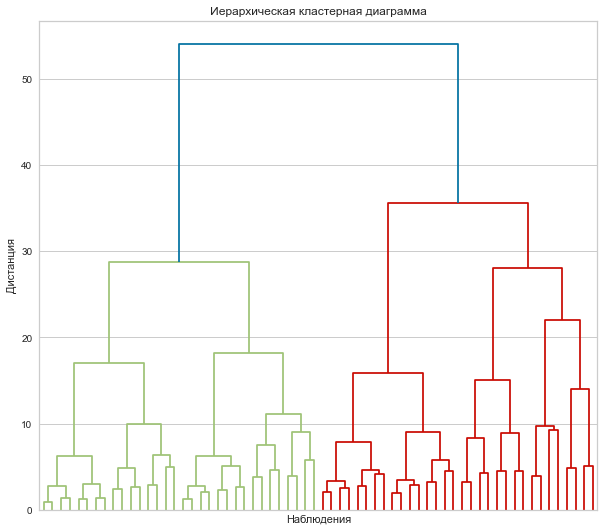

In [20]:
plt.figure(figsize=(10,9))
plt.title('Иерархическая кластерная диаграмма')
plt.xlabel('Наблюдения')
plt.ylabel('Дистанция')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

Из нее видно, что оптмальное количество кластеров - 2

До начала построения модели было определено оптимальное количество кластеров при помощи метода локтя. Его суть заключается том, что он вычисляет сумму квадратов расстояний между точками и рассчитывает среднее значение расстояния. Был построен график зависимости между значениями k и суммой квадратов расстояния внутри кластера с целью получения значения k. В точке, в которой график перестанет резко уменьшаться по оси Х и будет находиться наше искомое и желанное оптимальное количество кластеров

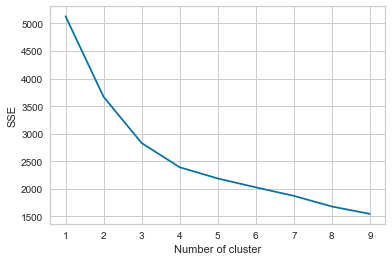

In [22]:
from sklearn.cluster import KMeans
data1 = dataset

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data1)
    data1["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Из графика видно, что точками перегиба являются значения являются k=2, k=3, k=4

In [21]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=3)
kmeans.fit(dataset)
df_kmeans = dataset.copy()
df_kmeans['KMeans Segment'] = kmeans.labels_
df_transf_kmeans = df_kmeans.groupby('KMeans Segment').mean()
df_transf_kmeans

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease
KMeans Segment,,,,,,,,,,
0,0.201610,0.662379,1.0,0.417119,0.510289,0.317623,0.538149,0.526096,0.132717,0.072771
1,0.217701,0.267752,0.0,0.615064,0.503699,0.320643,0.393328,0.330867,0.030165,0.018213


Выводы по кластерам: 

   0: Люди преклонного возраста с более высоким уровнем bmi и с большей склонностью к курению
   
   1: Молодые люди с более нормальным уровнем bmi и с меньшей тягой к курению, а также с гораздо меньшим количеством болезней сердца

In [22]:
df_kmeans['Labels'] = df_kmeans['KMeans Segment'].map({0:'Больные', 1:'Здоровые', })
df_kmeans.head(20)

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,KMeans Segment,Labels
0,0.5,0.816895,1.0,0.333333,1.0,0.260461,0.706989,0.333333,0,1,0,Больные
1,0.0,0.743652,1.0,0.666667,0.0,0.406199,0.661290,0.666667,0,0,0,Больные
2,0.5,0.975586,1.0,0.333333,0.0,0.447341,0.596774,0.666667,0,1,0,Больные
3,0.0,0.597168,1.0,0.333333,1.0,0.290067,0.647849,1.000000,0,0,0,Больные
4,0.0,0.963379,1.0,0.666667,0.0,0.272966,0.368280,0.666667,1,0,0,Больные
5,0.5,0.987793,1.0,0.333333,1.0,0.512346,0.502688,0.333333,0,0,0,Больные
6,0.5,0.902344,1.0,0.333333,0.0,0.131825,0.459677,0.666667,1,1,0,Больные
7,0.0,0.841309,0.0,0.333333,1.0,0.345808,0.336022,0.666667,0,0,1,Здоровые
8,0.0,0.719238,1.0,0.333333,0.0,0.185188,0.644086,0.000000,0,0,0,Больные
9,0.0,0.951172,1.0,0.333333,1.0,0.030380,0.373656,0.000000,0,0,0,Больные


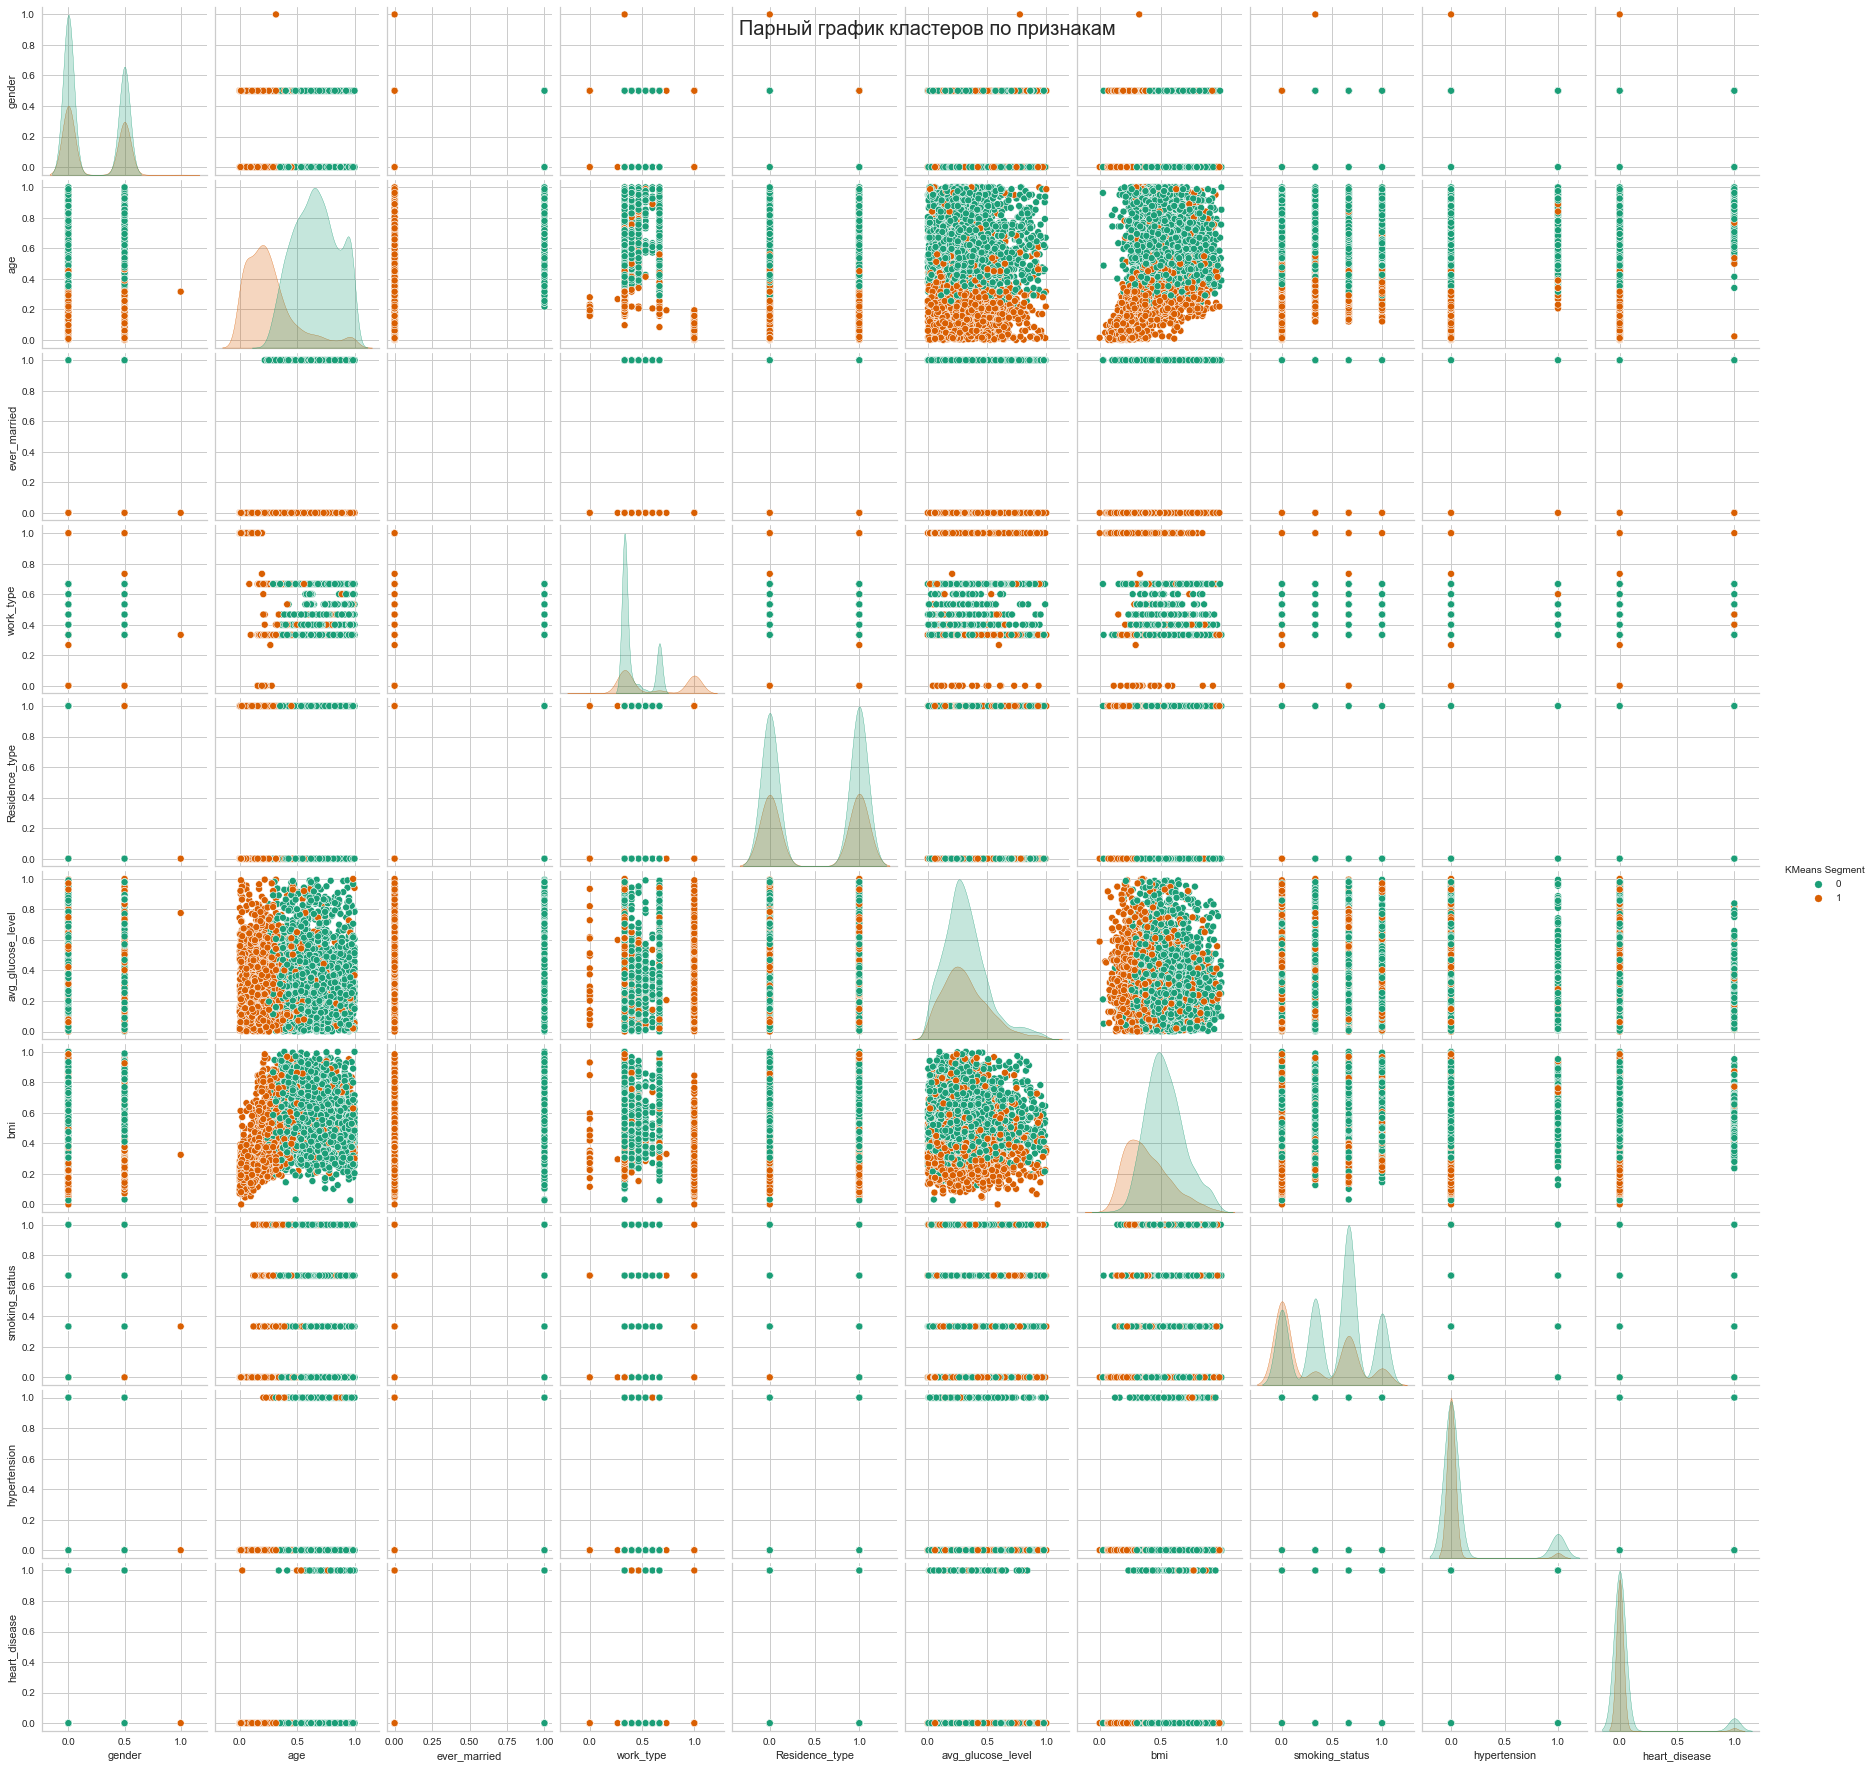

In [21]:
sns.pairplot(df_kmeans, hue = 'KMeans Segment', palette='Dark2')

plt.suptitle('Парный график кластеров по признакам', 
             size = 20);
#Зеленые - больные

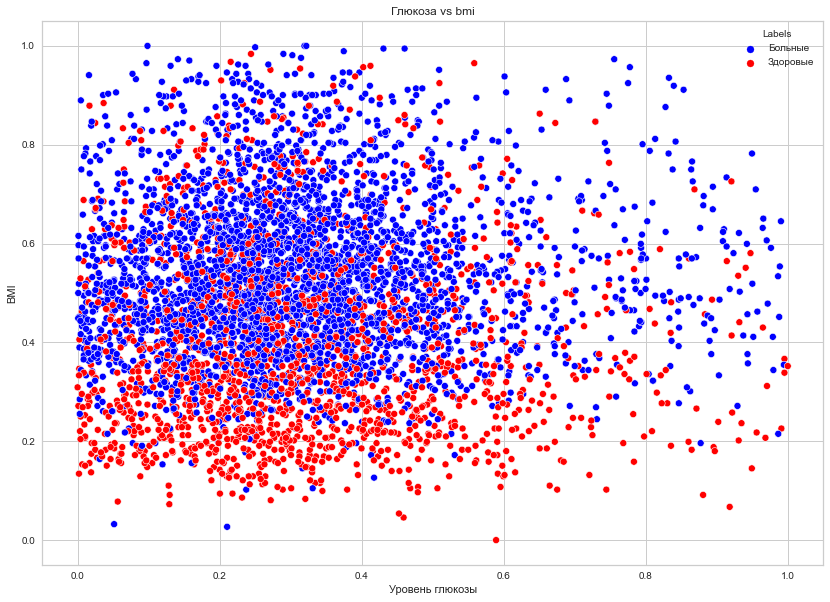

In [25]:
plt.figure(figsize=(14,10))
X = df_kmeans['avg_glucose_level']
Y = df_kmeans['bmi']
g = sns.scatterplot(X, Y, hue = df_kmeans['Labels'], palette = ['blue', 'red'])
g.set_xlabel('Уровень глюкозы')
g.set_ylabel('BMI')
g.set_title('Глюкоза vs bmi')
plt.show()



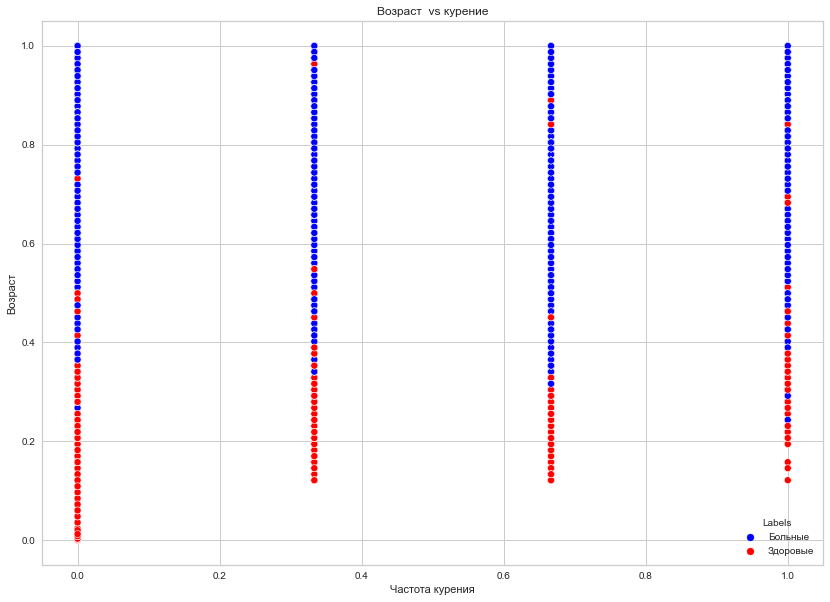

In [31]:
plt.figure(figsize=(14,10))
X = df_kmeans['smoking_status']
Y = df_kmeans['age']
g = sns.scatterplot(X, Y, hue = df_kmeans['Labels'], palette = ['blue', 'red'])
g.set_xlabel('Частота курения')
g.set_ylabel('Возраст')
g.set_title('Возраст  vs курение')
plt.show()



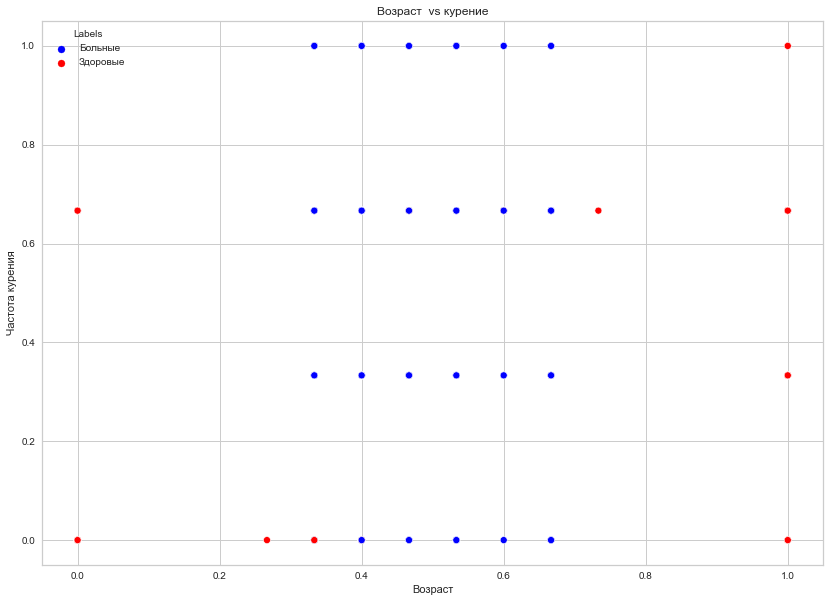

In [29]:
plt.figure(figsize=(14,10))
X = df_kmeans['work_type']
Y = df_kmeans['smoking_status']
g = sns.scatterplot(X, Y, hue = df_kmeans['Labels'], palette = ['blue', 'red'])
g.set_xlabel('Возраст')
g.set_ylabel('Частота курения')
g.set_title('Возраст  vs курение')
plt.show()



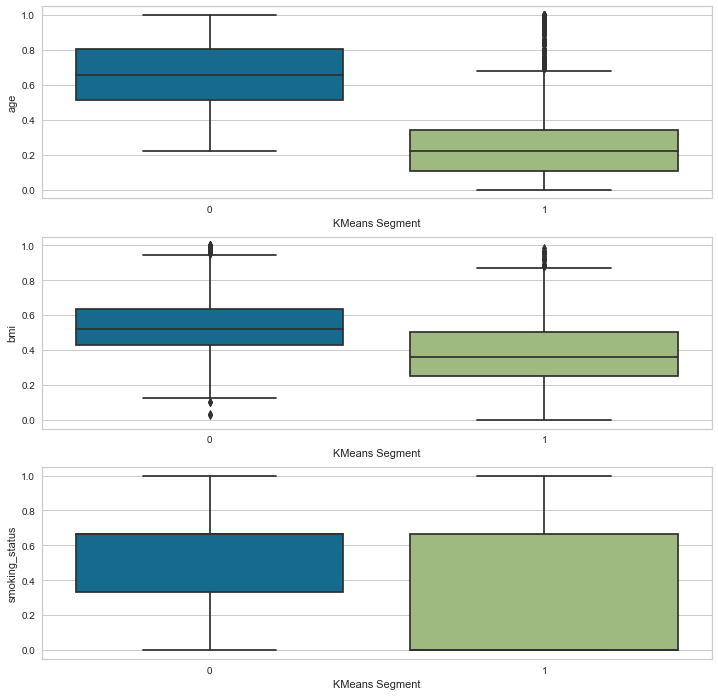

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 3,figsize=(12,12))

plt.figure(figsize=(12,8))
plot1 = sns.boxplot(x=df_kmeans['KMeans Segment'],y=df_kmeans['age'],data=df_kmeans, ax = ax1)

plt.figure(figsize=(12,8))
plot2 = sns.boxplot(x=df_kmeans['KMeans Segment'],y=df_kmeans['bmi'],data=df_kmeans, ax= ax2)
plt.figure(figsize=(12,8))
plot2 = sns.boxplot(x=df_kmeans['KMeans Segment'],y=df_kmeans['smoking_status'],data=df_kmeans, ax= ax3)

K-means

## 2. Классификация

На том же датасете про страны попробуем осуществить задачу классификации. Предположим, что определенный нами номер кластера - истина и уже известен.

Задача следующая: определить набор фичей, которые помогут предсказать в дальнейшем уровень развития страны.

Исходный датафрейм:

In [23]:
df_kmeans['stroke']=df1

В качестве фич рассмотрим все присущетсвующие признаки, цель - кластер.

Рассмотрим 3 метода классификации и определим наиболее точный:

    метод ближайших соседей

    метод опорных векторов

    метод случайного леса



Начинаем с разделения нашей выборки на учебную и тестовую:

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

data = df_kmeans.sample(frac=1)
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
def mae(y_test, y_pred):
    return np.mean(abs(y_test - y_pred))


def fit_and_evaluate(model):
    
    # Учим модель
    model.fit(X_train, y_train)
    

    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    

    return model_mae

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_mae = fit_and_evaluate(knn)

print('KNeighborsClassifier Performance on the test set: MAE = %0.4f' % knn_mae)

svm = SVC(kernel='linear')
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Performance on the test set: MAE = %0.4f' % svm_mae)

random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl_mae = fit_and_evaluate(random_forest_cl)

print('Random Forest Classifier Performance on the test set: MAE = %0.4f' % random_forest_cl_mae)

KNeighborsClassifier Performance on the test set: MAE = 0.0463
Support Vector Machine Performance on the test set: MAE = 0.0424
Random Forest Classifier Performance on the test set: MAE = 0.0437


Наиболее точным оказался метод опорных векторов

In [58]:
# X = data[['avg_glucose_level', 'age','bmi']]
# y = data['stroke']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gender=1
age=0.8
hypertension=0
heart_disease=0
ever_married=0
work_type=1
Residence_type=0
avg_glucose_level=0.3
bmi=0.1
smoking_status=0.8



model = SVC(kernel='linear')
model.fit(X_train, y_train)
new_country = model.predict([[gender,age,hypertension, heart_disease, ever_married, work_type,Residence_type,avg_glucose_level,bmi,smoking_status]])
new_country


array([0], dtype=int64)

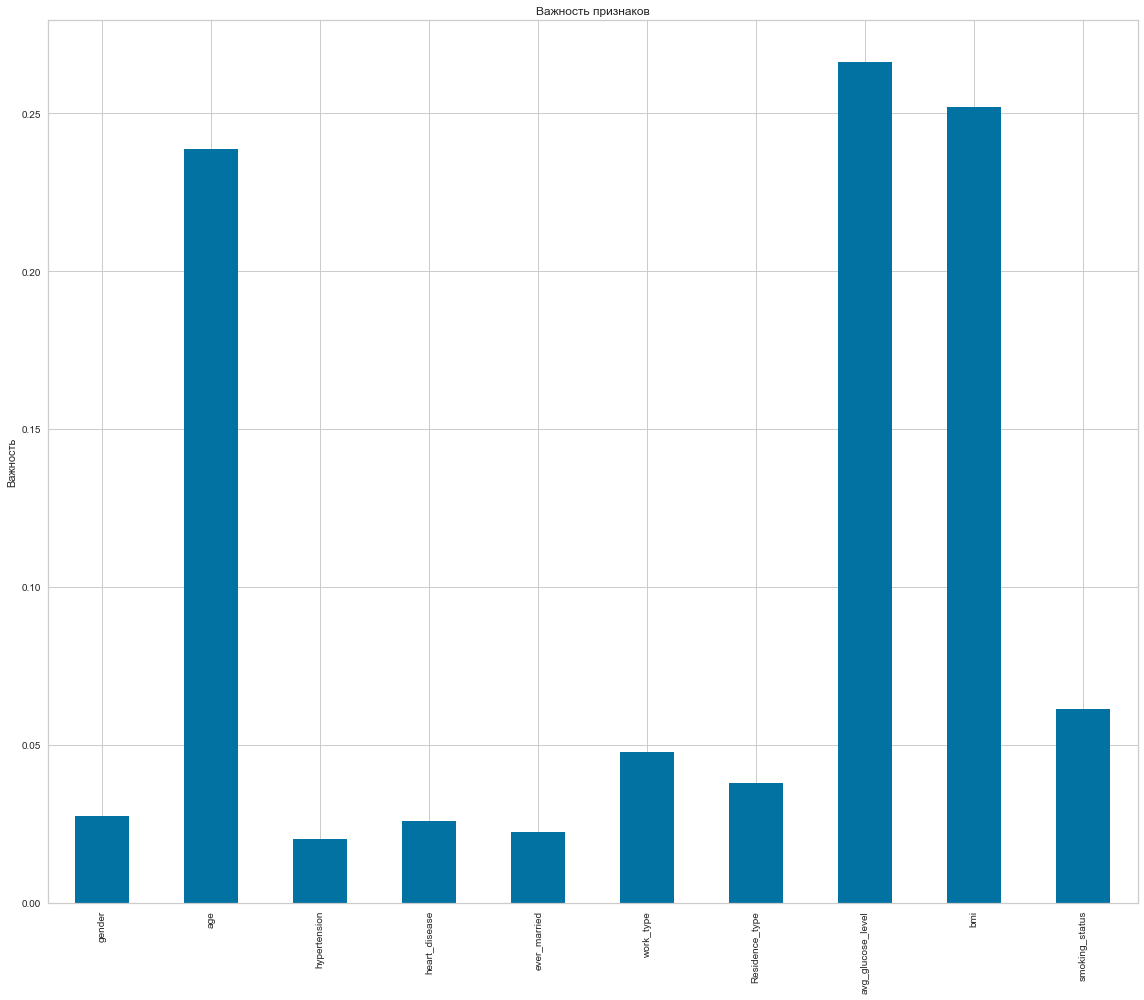

In [59]:
random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl.fit(X_train, y_train)
random_forest_cl_imp = pd.Series(random_forest_cl.feature_importances_,
                         X_train.columns)

fig, ax = plt.subplots(figsize=(16,14))
random_forest_cl_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Выводы:

    Решив задачу кластеризации, нам удалось выделить группы людей по их риску возникноваения инсульта и удалось определть наиболее подверженные группы населения. 

    Задача классификации позволяет предсказать кластер для страны, ранее не участвоващей в анализе. Таким образом, можно происследовать оставшиеся страны и, возможно, дополнить список стран, которым необходима финансовая помощь.